In [1]:
# Description: Plot figure 8.
#              (difference between composites of high and low SAM indices).
#
#              -(a): Map of the difference between the ensemble averages of Tbot from
#                    the 90th and the 10th percentiles of the annually-averaged SAM index.
#              -(b): Same as panel (a), but for the Niño 3.4 index.
#
# Here, "Tbot" denotes the model potential temperature (referenced to 0 dbar)
# at the grid cell closest to the bottom or closest to 1000 m depth, whichever
# is shallower.
#
# Author:      André Palóczy
# E-mail:      paloczy@gmail.com
# Date:        January/2018

import sys
sys.path.append('../../misc')
sys.path.append('../../data_reproduce_figs')
sys.path.append('/home/andre/Dropbox/python-modules/pygamman')

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from mpl_toolkits.basemap import Basemap
import cmocean.cm as cmo
from xarray import open_dataset
from local_utils import blkavgt, near


def bmap_antarctica(ax, bbox=[-180, 180, -77, -59], resolution='i'):
    """
    Full Antartica basemap (Polar Stereographic Projection).
    """
    kwm = dict(projection='spstere', resolution=resolution, ax=ax)
    kwm.update(dict(boundinglat=-60, lon_0=60))
    m = Basemap(**kwm)

    m.drawmapboundary(zorder=-9999)
    m.drawcoastlines(zorder=10, linewidth=0.5)
    m.fillcontinents(color='0.9', zorder=9)
    m.drawmeridians(np.arange(-180, 180, 45), linewidth=0.15, labels=[0, 1, 0, 1], zorder=12)
    m.drawparallels(np.arange(-90, -50, 5), linewidth=0.15, labels=[0, 0, 0, 0], zorder=12)

    return m

plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.unicode'] = True
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')

In [2]:
plt.close('all')

idxpercentile = 10

head = '../../data_reproduce_figs/'
fpt = head + 'PTbot.npz'
fname_isobs = head + 'isobaths.nc'
idxpercentile_upper = 100 - idxpercentile

In [3]:
# Define limits of the segments (see Figure 1a map in the manuscript).
segs_lims = {
'Ross':[165., -150., -79., -68.],
'Byrd':[-150., -130., -79., -68.],
'Amundsen':[-130, -100, -76., -64.],
'Bellingshausen':[-100., -75., -77., -60.],
'S-AP':[-75., -64., -74., -60.],
'N-AP':[-64., -53., -74., -60.],
'Weddell':[-53., -11., -78., -59.],
'W-EA':[-11., 65., -72., -60.],
'C-EA':[65., 100., -72., -60.],
'E-EA':[100., 165., -72., -60.]}

In [4]:
# Load climate indices.
SAM = open_dataset(head+'sam_yearly.nc')['SAM']
NINO34 = open_dataset(head+'nino34_yearly.nc')['NINO34']

In [5]:
# Load isobaths.
misob = 1000
iisob, oisob = 800, 2500
ncxm = Dataset(fname_isobs)
xmisob = ncxm["%d m isobath (U-points)"%misob]['xiso'][:]
ymisob = ncxm["%d m isobath (U-points)"%misob]['yiso'][:]
xiisob = ncxm["%d m isobath (U-points)"%iisob]['xiso'][:]
yiisob = ncxm["%d m isobath (U-points)"%iisob]['yiso'][:]
xoisob = ncxm["%d m isobath (U-points)"%oisob]['xiso'][:]
yoisob = ncxm["%d m isobath (U-points)"%oisob]['yiso'][:]

In [6]:
# Load model potential temperature fields.
d = np.load(fpt)
xpt = d['lon']
ypt = d['lat']
tmod = np.array(d['t'])
pt = d['pt'] # [degC].

In [7]:
# Calculate High SAM/Niño 3.4 and low SAM/Niño 3.4 ensemble averages.

# SAM.
lopercSAM = np.percentile(SAM, idxpercentile)
hipercSAM = np.percentile(SAM, idxpercentile_upper)
floSAM = SAM<=lopercSAM
fhiSAM = SAM>=hipercSAM
floSAM = floSAM.values
fhiSAM = fhiSAM.values

SAMlo = SAM[floSAM]
SAMhi = SAM[fhiSAM]
yearslo, yearshi = SAMlo['time.year'], SAMhi['time.year']
loSAM = SAMlo.mean().values.flatten()[0]
hiSAM = SAMhi.mean().values.flatten()[0]
print("Mean high SAM = %.1f"%hiSAM)
print("Mean low SAM = %.1f"%loSAM)

# Niño 3.4.
lopercNINO34 = np.percentile(NINO34, idxpercentile)
hipercNINO34 = np.percentile(NINO34, idxpercentile_upper)
floNINO34 = NINO34<=lopercNINO34
fhiNINO34 = NINO34>=hipercNINO34
floNINO34 = floNINO34.values
fhiNINO34 = fhiNINO34.values

NINO34lo = NINO34[floNINO34]
NINO34hi = NINO34[fhiNINO34]
yearslo_nino34, yearshi_nino34 = NINO34lo['time.year'], NINO34hi['time.year']
loNINO34 = NINO34lo.mean().values.flatten()[0]
hiNINO34 = NINO34hi.mean().values.flatten()[0]
print("Mean high Niño 3.4 = %.1f"%hiNINO34)
print("Mean low Niño 3.4 = %.1f"%loNINO34)

Mean high SAM = 1.1
Mean low SAM = -0.7
Mean high Niño 3.4 = 1.4
Mean low Niño 3.4 = -1.1


In [8]:
floMOD = np.array([yearmod in yearslo.values for yearmod in tmod])
fhiMOD = np.array([yearmod in yearshi.values for yearmod in tmod])
floMOD_NINO34 = np.array([yearmod in yearslo_nino34.values for yearmod in tmod])
fhiMOD_NINO34 = np.array([yearmod in yearshi_nino34.values for yearmod in tmod])

loSAMpt = np.nanmean(pt[floMOD, ...], axis=0)
hiSAMpt = np.nanmean(pt[fhiMOD, ...], axis=0)
loNINO34pt = np.nanmean(pt[floMOD_NINO34, ...], axis=0)
hiNINO34pt = np.nanmean(pt[fhiMOD_NINO34, ...], axis=0)

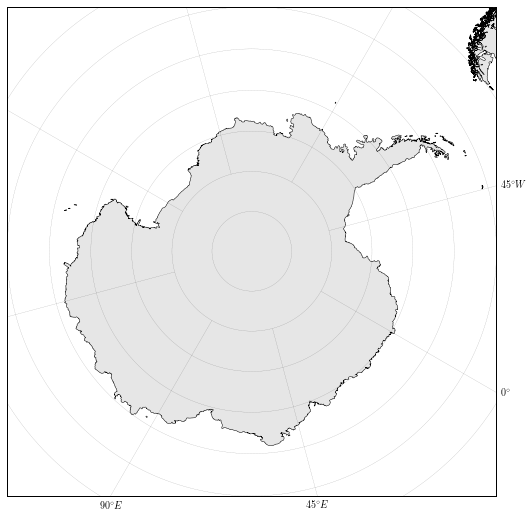

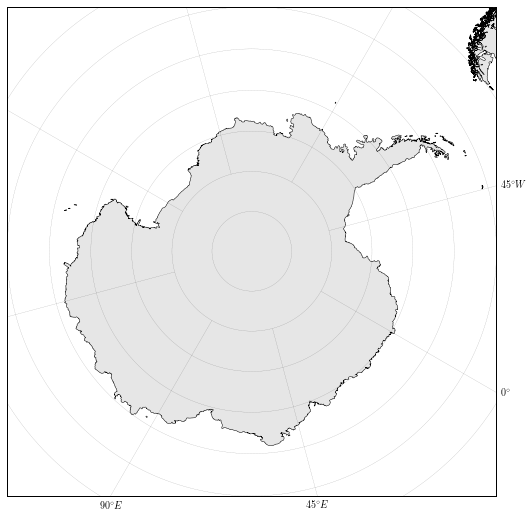

In [9]:
# Plot the maps of temperature difference.
figsize = (9, 9)
fmt = 'png'
kwsavefig = dict(fmt=fmt, dpi=150, bbox_inches='tight', pad_inches=0.05)
dptmin, dptmax = -0.8, 0.8

fig1, ax1 = plt.subplots(figsize=figsize)
fig2, ax2 = plt.subplots(figsize=figsize)
m1 = bmap_antarctica(ax1)
m2 = bmap_antarctica(ax2)

In [10]:
dpt = hiSAMpt - loSAMpt
dpt2 = hiNINO34pt - loNINO34pt

cs1 = m1.pcolormesh(xpt, ypt, dpt, vmin=dptmin, vmax=dptmax, cmap=cmo.balance, latlon=True, zorder=1)
cs2 = m2.pcolormesh(xpt, ypt, dpt2, vmin=dptmin, vmax=dptmax, cmap=cmo.balance, latlon=True, zorder=1)

Text(-3.41421e+06,-3.41421e+06,'(b) 10 \\% highest - lowest Niño 3.4')

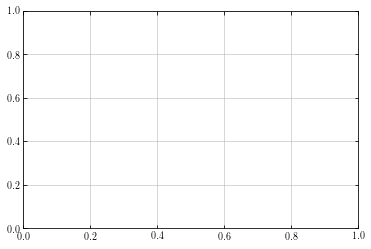

In [11]:
cax1 = fig1.add_axes([0.33, 0.45, 0.30, 0.010])
cax2 = fig2.add_axes([0.33, 0.45, 0.30, 0.010])
cb1 = plt.colorbar(mappable=cs1, cax=cax1, orientation='horizontal', extend='both')
cb1.ax.tick_params(labelsize=10, top=True, labeltop=False, labelbottom=True)
m1.plot(xmisob, ymisob, color='k', linewidth=1, latlon=True)
m1.plot(xiisob, yiisob, color='m', linewidth=0.5, latlon=True)
m1.plot(xoisob, yoisob, color='m', linewidth=0.5, latlon=True)
#
cb2 = plt.colorbar(mappable=cs2, cax=cax2, orientation='horizontal', extend='both')
cb2.ax.tick_params(labelsize=10, top=True, labeltop=False, labelbottom=True)
m2.plot(xmisob, ymisob, color='k', linewidth=1, latlon=True)
m2.plot(xiisob, yiisob, color='m', linewidth=0.5, latlon=True)
m2.plot(xoisob, yoisob, color='m', linewidth=0.5, latlon=True)
cblab = r'$\theta$ difference [\textdegree C]'
cbkw = dict(fontsize=18, fontweight='black', labelpad=2)
cb1.set_label(cblab, **cbkw)
cb2.set_label(cblab, **cbkw)

xt1, yt1 = m1.projtran(-179.9, -90)
xt2, yt2 = m2.projtran(-179.9, -90)
ax1.text(xt1, yt1, '(a) '+str(int(idxpercentile))+' \% highest - lowest SAM', fontsize=11, fontweight='black', zorder=9999, ha='center')
ax2.text(xt2, yt2, '(b) '+str(int(idxpercentile))+' \% highest - lowest Niño 3.4', fontsize=11, fontweight='black', zorder=9999, ha='center')

In [12]:
# Define the annotations' properties.

kwtxt = dict(fontsize=9, color='r', fontweight='bold', zorder=999, ha='center', va='center')
txtrotang = {'Amundsen':10, 'Bellingshausen':-15, 'S-AP':0, 'N-AP':-10, 'Weddell':0, 'W-EA':45, 'C-EA':0, 'E-EA':-75, 'Ross':30, 'Byrd':30}
xtseg = {'Amundsen':-3399889.35999466,
         'Bellingshausen':-4325029.32189797,
         'Byrd':-3077742.4089747583,
         'C-EA':-2428492.39999619,
         'E-EA':-1156424.95237914,
         'N-AP':-6337208.73903767,
         'Ross':-1873408.4228542,
         'S-AP':-5504582.77332469,
         'W-EA':-4764470.80380204,
         'Weddell':-5758996.2628481}
ytseg = {'Amundsen':-5646107.16035395,
         'Bellingshausen':-4697838.69940305,
         'Byrd':-4718902.153892816,
         'C-EA':-1506105.83083664,
         'E-EA':-2639402.28416819,
         'N-AP':-5368565.17178295,
         'Ross':-4281525.71654656,
         'S-AP':-5622978.66130636,
         'W-EA':-2153703.80416895,
         'Weddell':-3842084.23464249}

In [13]:
segxl_prev = None
kwstxt = dict(color='r', marker='+', ms=10, mew=2, zorder=15, latlon=True)
for seg in segs_lims.keys():
    segxl, segxr = segs_lims[seg][:2]
    idxl = near(xmisob, segxl, return_index=True)
    idxr = near(xmisob, segxr, return_index=True)
    segxl, segxr = xmisob[idxl], xmisob[idxr]
    segyl, segyr = ymisob[idxl], ymisob[idxr]
    m1.plot(segxl, segyl, **kwstxt)
    m2.plot(segxl, segyl, **kwstxt)
    if segxr!=segxl_prev:
        m1.plot(segxr, segyr, **kwstxt)
        m2.plot(segxr, segyr, **kwstxt)
    segxl_prev = segxl

for seg in segs_lims.keys():
    ax1.text(xtseg[seg], ytseg[seg], seg, rotation=txtrotang[seg], **kwtxt)
    ax2.text(xtseg[seg], ytseg[seg], seg, rotation=txtrotang[seg], **kwtxt)

In [14]:
plt.draw()
fig1.savefig('difference_hiSAMloSAM-%dpercentile.'%idxpercentile + fmt, **kwsavefig)
fig2.savefig('difference_hiNINO34loNINO34-%dpercentile.'%idxpercentile + fmt, **kwsavefig)
fig1.show()
fig2.show()

<Figure size 432x288 with 0 Axes>